In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('dark_background')
sns.set(style = 'darkgrid', palette = 'bright', font_scale=1.5)

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 부모님의 학력과 자녀의 시험점수의 상관관계

In [7]:
df.describe()
## std : 표준 편차

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 데이터 상관관계 출력

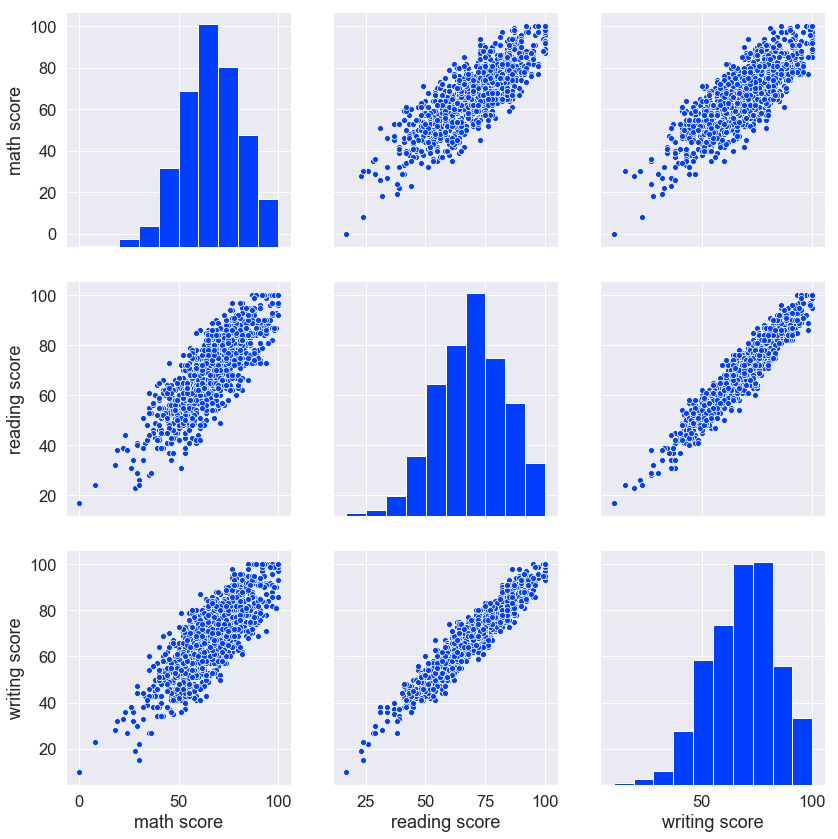

In [8]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], height = 4)
# 오른쪽 중간 그래프는 리딩점수랑, 쓰기점수의 상관관계가 겁나 높음

### Compute Average Score 

In [13]:
def average_score(dt):
    return(dt['math score'] + dt['reading score'] + dt['writing score']) / 3 ## 컬렁명만 맞춰서 함수 만들자

In [14]:
df['average score'] = df.apply(average_score, axis = 1)
# axis 축으로 세 과목의 점수의 평균을 구해서 데이터 프레임의 average score 에 저장

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Lunch (점심 식사 여부와 성적과의 상관관계)

Text(0.5, 1.0, 'math')

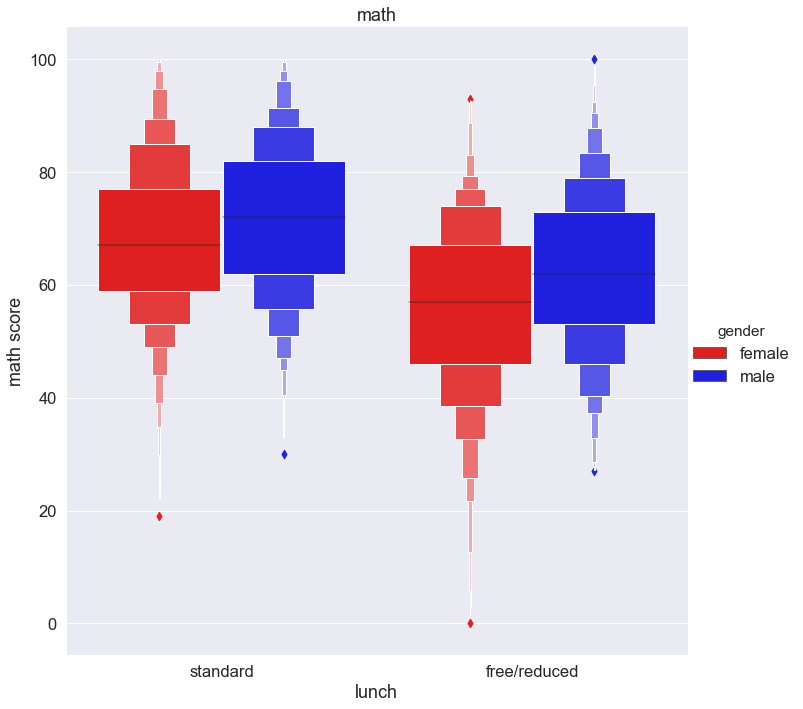

In [16]:
#점식식사 여부가 수학점수, 읽기점수, 쓰기점수에 미치는 영향
sns.catplot(x='lunch', y='math score', hue = 'gender', kind ='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('math')
#1. 남학생의 수학점수 평균이 여학생 수학점수 평균보다 높음
#2. 점심을 먹고 안먹고에 따라 성적이 차이가 있음
#3. 여자들은 점심 안먹으면 성적이 저 아래까지 내려갈 수 있음

Text(0.5, 1.0, 'math')

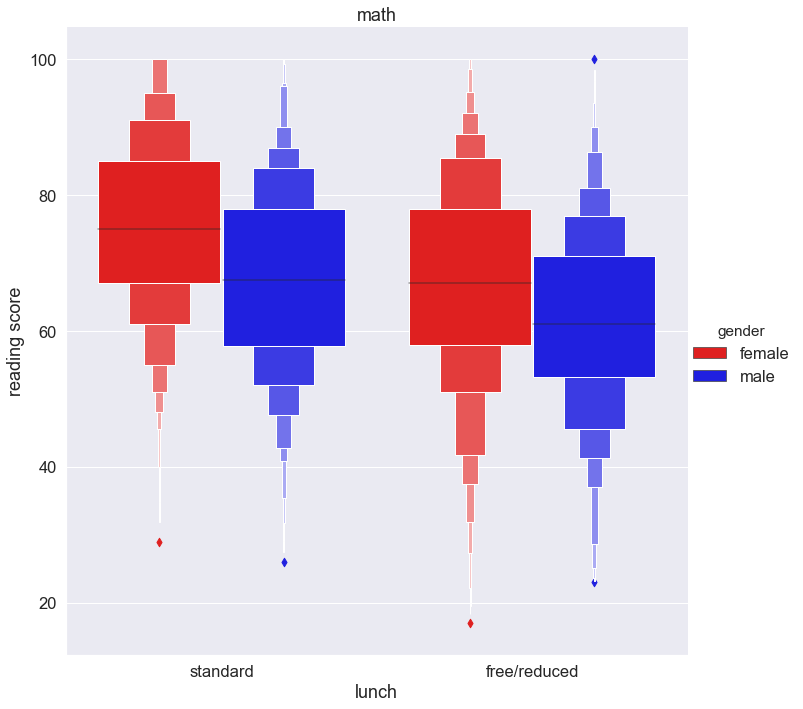

In [17]:
sns.catplot(x='lunch', y='reading score', hue = 'gender', kind ='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('math')

## Test Preperation Course

### 시험 대비 과목과 점수의 상관관계

Text(0.5, 1.0, 'math')

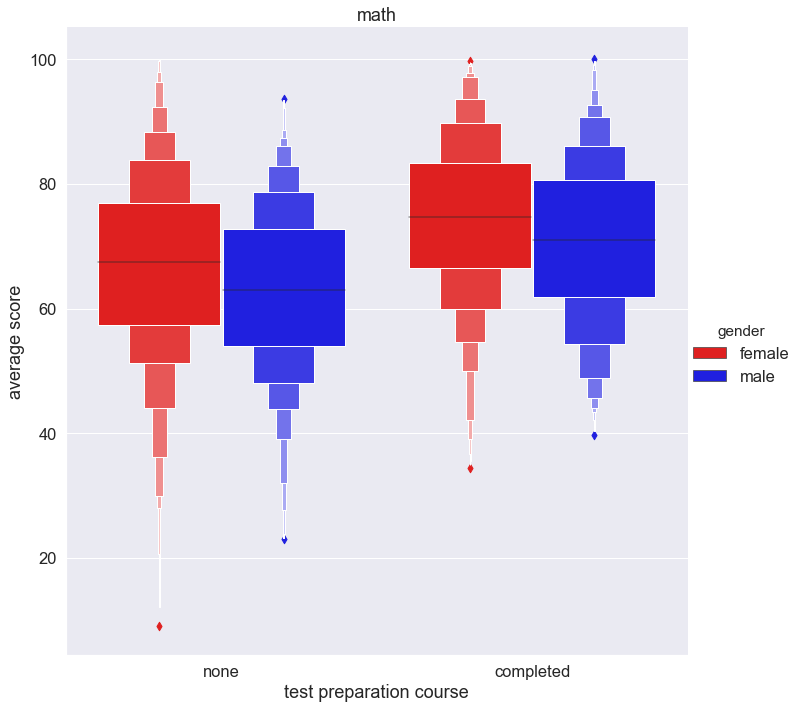

In [21]:
# 시험을 위한 준비과목을 수강했냐 안했냐에 따른 시험 점수의 상관관계
sns.catplot(x='test preparation course', y='average score', hue = 'gender', kind ='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('math')

# 왼쪽아이들이 시험을 위한 코스 수강안한 애들 오른쪽은 반대의 경우
# 평균점수 기준이니까. 여자아이들의 평균보다 남자보다 높음

## Parental Level of Education

No handles with labels found to put in legend.


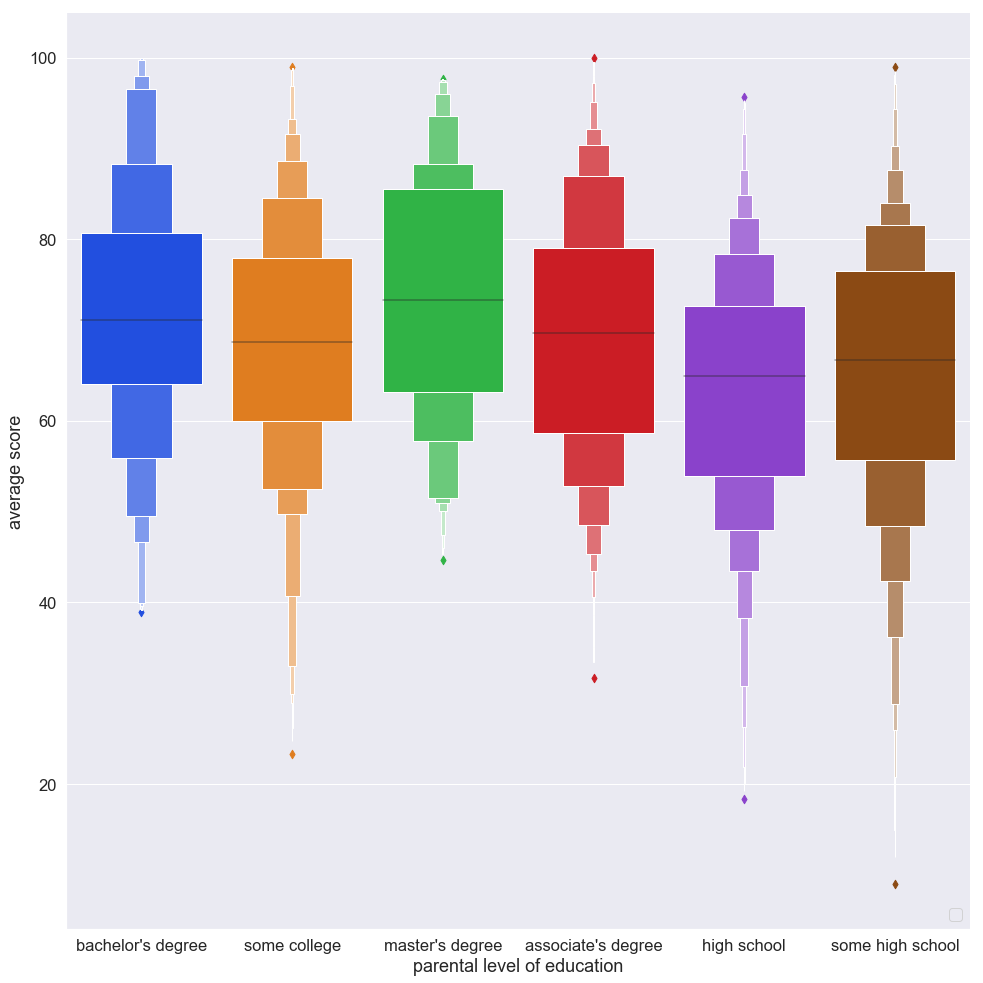

In [26]:
sns.catplot(x='parental level of education', y='average score', kind ='boxen', data=df, height=14)
plt.legend(loc='lower right')

#상관관계가 있긴 하지만 심각하진 않다